# Homework 8: Central Limit Theorem

**Reading**: Textbook chapter [14](https://umass-data-science.github.io/190fwebsite/textbook/14/why-the-mean-matters/).

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

Homework 8 is due **Thursday, 11/17 at 11:00pm**. Start early so that you can come to office hours if you're stuck.

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

For all problems that you must write our explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on.

In [1]:
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

import otter
grader = otter.Notebook()

## 1. The Bootstrap and The Normal Curve


In this exercise, we will explore a dataset that includes the safety inspection scores for restauraunts in the city of Austin, Texas.  We will be interested in determining the average restaurant score (out of 100) for the city from a random sample of the scores.  We'll compare two methods for computing a confidence interval for that quantity: the bootstrap resampling method, and an approximation based on the Central Limit Theorem.

In [2]:
# Just run this cell.
pop_restaurants = Table.read_table('restaurant_inspection_scores.csv').drop(5,6)
pop_restaurants

Restaurant Name,Zip Code,Inspection Date,Score,Address
6M Grocery,78652,01/17/2014,90,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,04/27/2015,93,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,05/02/2016,88,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,07/25/2014,100,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,10/21/2015,87,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,12/15/2014,93,"805 W FM 1626 RD AUSTIN, TX 78652"
7 Eleven #36575,78660,01/25/2016,92,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"
7 Eleven #36575,78660,03/05/2015,86,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"
7 Eleven #36575,78660,03/14/2014,93,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"
7 Eleven #36575,78660,07/27/2015,97,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"


**Question 1** (Ungraded):
Plot a histogram of the scores.

<!-- BEGIN QUESTION -->



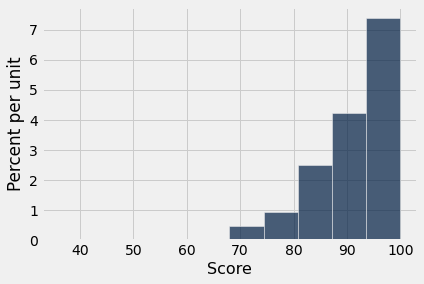

In [3]:
pop_restaurants.hist('Score')

<!-- END QUESTION -->

This is the population mean:

In [4]:
pop_mean = np.mean(pop_restaurants.column(3))
pop_mean

91.40706693478886

Often it is impossible to find complete datasets like this.  Imagine we instead had access only to a random sample of 100 restaurant inspections, called `restaurant_sample`.  That table is created below. We are interested in using this sample to estimate the population mean.

In [5]:
np.random.seed(123)

restaurant_sample = pop_restaurants.sample(100, with_replacement=False)
restaurant_sample

Restaurant Name,Zip Code,Inspection Date,Score,Address
Dream Dinners,78750,09/25/2015,93,"12129 N FM 620 RD AUSTIN, TX 78750 (30.4544, -97.8267)"
Casis Elementary,78703,11/06/2013,97,"2710 EXPOSITION BLVD AUSTIN, TX 78703 (30.303357, -97.76435)"
"Juiceland Shady Hollow, LLC",78748,04/17/2015,93,"9901 BRODIE LN Unit 110 AUSTIN, TX 78748 (30.185651, -97 ..."
Stassney Food Mart,78744,05/13/2015,90,"5717 S IH 35 SVRD NB Bldg D AUSTIN, TX 78744 (30.197695, ..."
Poco Loco Supermercado,78745,05/28/2015,61,"611 W BEN WHITE BLVD EB AUSTIN, TX 78745 (30.226978, -97 ..."
Conoco,78741,11/06/2014,97,"6214 E RIVERSIDE DR AUSTIN, TX 78741 (30.225194, -97.703922)"
Patsy's,78744,07/17/2014,79,"5001 E BEN WHITE BLVD EB AUSTIN, TX 78744 (30.213856, -9 ..."
Fresh Cup Frozen Yogurt,78753,05/13/2014,93,"13000 N IH 35 SVRD SB Bunit 116 AUSTIN, TX 78753 (30.408 ..."
Pizza Hut,78749,05/19/2014,88,"8400 BRODIE LN Unit 108 AUSTIN, TX 78749 (30.199823, -97 ..."
WL-Subway,78746,07/18/2014,85,"3736 BEE CAVES RD WEST LAKE HILLS, TX 78746 (30.280195, ..."


**Question 2** (Ungraded): Plot a histogram of the **sample** scores. 

<!-- BEGIN QUESTION -->



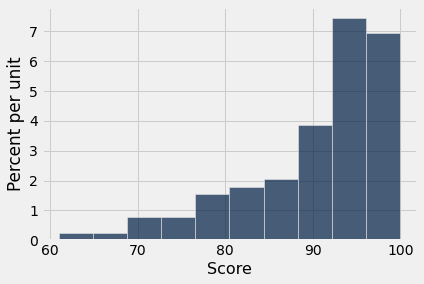

In [6]:
restaurant_sample.hist('Score')


<!-- END QUESTION -->

This is the **sample mean**:

In [7]:
sample_mean = np.mean(restaurant_sample.column(3))
sample_mean

90.5

**Question 3**: Complete the function `bootstrap_scores` below. It should take no arguments. It should simulate drawing 5000 resamples from `restaurant_sample` and computing the mean restaurant score in each resample.  It should return an array of those 5000 resample means.

In [8]:
#Resample from resampled mean 5000 times
np.random.seed(123)

def bootstrap_scores(restaurant_sample):
    resampled_means = make_array()
    for i in range(5000):
        resampled_mean = np.mean(restaurant_sample.sample().column("Score"))
        resampled_means = np.append(resampled_means, resampled_mean)
    return resampled_means

resampled_means = bootstrap_scores(restaurant_sample)
resampled_means

array([90.6 , 90.64, 89.46, ..., 89.3 , 90.34, 91.32])

In [9]:
grader.check("q1.3")

q1.3 results: All test cases passed!

Take a look at the histogram of the **resampled means**.

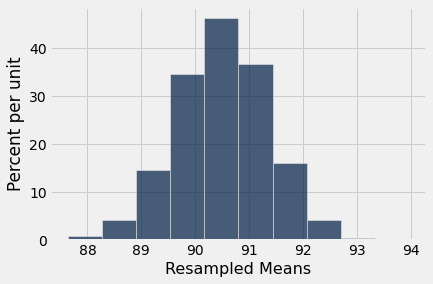

In [10]:
Table().with_column('Resampled Means', resampled_means).hist()

**Question 4**: Compute a 95 percent confidence interval for the average restaurant score using the array `resampled_means`.

In [11]:
lower_bound = percentile(2.5, resampled_means)
upper_bound = percentile(97.5, resampled_means)
print("95% confidence interval for the average restaurant score, computed by bootstrapping:\n(",lower_bound, ",", upper_bound, ")")

95% confidence interval for the average restaurant score, computed by bootstrapping:
( 88.79 , 92.13 )


In [12]:
grader.check("q1.4")

q1.4 results: All test cases passed!

**Question 5**: Does the distribution of the resampled mean scores look normally distributed? State "yes" or "no" and describe in one sentence why you should expect this result.

Yes, the histogram accurately represents a normal distribution

<!-- END QUESTION -->

**Question 6:** Does the distribution of the **sample scores** (notice we're no longer talking about the resampled means) look normally distributed? State "yes" or "no" and describe in one sentence why you should expect this result.

No, the histogram is clearly not normally distributed.

<!-- END QUESTION -->

For the last question, you'll need to recall two facts.
1. If a group of numbers has a normal distribution, around 95% of them lie within 2 standard deviations of their mean.
2. The Central Limit Theorem tells us the quantitative relationship between
    * the standard deviation of an array of numbers and
    * the standard deviation of an array of means of samples taken from those numbers.

**Question 7:** Without referencing the array `resampled_means` or performing any new simulations, calculate an interval around the `sample_mean` that covers approximately 95% of the numbers in the `resampled_means` array.  **You may use the following values to compute your result, but you should not perform additional resampling** - think about how you can use the CLT to accomplish this.

In [13]:
sample_mean = np.mean(restaurant_sample.column(3))
sample_sd = np.std(restaurant_sample.column(3))
sample_size = restaurant_sample.num_rows

lower_bound_normal = sample_mean - 1.96 * sample_sd / np.sqrt(sample_size)
upper_bound_normal = sample_mean + 1.96 * sample_sd / np.sqrt(sample_size)
print("95% confidence interval for the average restaurant score, computed by a normal approximation:\n(",lower_bound_normal, ",", upper_bound_normal, ")")

95% confidence interval for the average restaurant score, computed by a normal approximation:
( 88.86049778286213 , 92.13950221713787 )


In [14]:
grader.check("q1.7")

q1.7 results: All test cases passed!

This confidence interval should look very similar to the one you computed in Question 4. If not, try calculating the inner 95 percent using 1.96 standard deviations instead of 2 for a more precise calculation. If they are still very different, there may be an error in your code.

## 2. Testing the Central Limit Theorem


The Central Limit Theorem tells us that the probability distribution of the **sum** or **average** of a large random sample drawn with replacement will be roughly normal, *regardless of the distribution of the population from which the sample is drawn*.

That's a pretty big claim, but the theorem doesn't stop there. It further states that the standard deviation of this normal distribution is given by 

$$\frac{\texttt{sd of the original distribution}}{\sqrt{\texttt{sample size}}}$$ 

In other words, suppose we start with *any distribution* that has standard deviation $x$, take a sample of size $n$ (where $n$ is a large number) from that distribution with replacement, and compute the **mean** of that sample. If we repeat this procedure many times, then those sample means will have a normal distribution with standard deviation $\frac{x}{\sqrt{n}}$.

That's an even bigger claim than the first one! The proof of the theorem is beyond the scope of this class, but in this exercise, we will be exploring some data to see the CLT in action.

**Question 1.** The CLT only applies when sample sizes are "sufficiently large." This isn't a very precise statement. Is 10 large?  How about 50?  The truth is that it depends both on the original population distribution and just how "normal" you want the result to look. Let's use a simulation to get a feel for how the distribution of the sample mean changes as sample size goes up.

Consider a coin flip. If we say `Heads` is $1$ and `Tails` is $0$, then there's a 50% chance of getting a 1 and a 50% chance of getting a 0, which is definitely not a normal distribution.  The average of several coin tosses, where Heads is 1 and Tails is 0, is equal to the proportion of heads in those coin tosses, so the CLT should apply if we compute the sample proportion of heads many times.

Write a function called `simulate_sample_n` that takes in a sample size $n$. It should return an array that contains 5000 sample proportions of heads, each from $n$ coin flips.

In [15]:
def sample_size_n(n):
    coin_proportions = make_array(.5, .5) # our coin is fair
    heads_proportions = make_array()
    for i in np.arange(5000):
        simulated_proportions = sample_proportions(n, coin_proportions)
        prop_heads = simulated_proportions[0]
        heads_proportions = np.append(heads_proportions, prop_heads)
    return heads_proportions

sample_size_n(5)

array([0.8, 0.8, 0.6, ..., 0.6, 0.4, 0.2])

In [16]:
grader.check("q2.1")

q2.1 results: All test cases passed!

This code below will use the function you just defined to plot the empirical distribution of the sample mean for various sample sizes. Change the x value to several different numbers and run the code. The x- and y-scales are kept the same to facilitate comparisons. Notice the shape of the graph as the sample size increases and decreases.

Sample SD: 0.24611846233064272


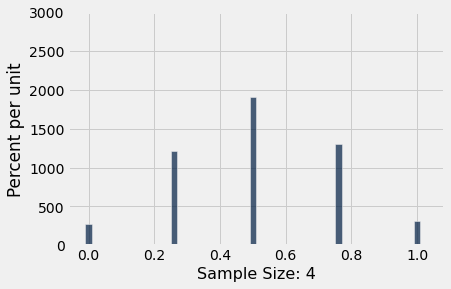

In [17]:
def graph(f, x):
    bins = np.arange(-0.01,1.05,0.02)
    sample_props = f(x)
    Table().with_column('Sample Size: {}'.format(x), sample_props).hist(bins=bins)
    plt.ylim(0, 30)
    print('Sample SD:', np.std(sample_props))
    plt.show()
    
x = 4   
graph(sample_size_n, x)

You can see that even the means of samples of 10 items follow a roughly bell-shaped distribution.  A sample of 50 items looks quite bell-shaped.

**Question 2:** In the plot for a sample size of 10, why are the bars spaced at intervals of .1, with gaps in between?

The distance between the bins creates the gaps between the bars.

<!-- END QUESTION -->

Now we will test the second claim of the CLT: That the SD of the sample mean is the SD of the original distribution, divided by the square root of the sample size.

We have imported the flight delay data and computed its standard deviation for you.

In [18]:
united = Table.read_table('united_summer2015.csv')
united_std = np.std(united.column('Delay'))
united_std

39.480199851609314

**Question 3:** Write a function called `empirical_sample_mean_sd` that takes a sample size `n` as its argument. The function should simulate 500 samples with replacement of size `n` from the flight delays dataset, and it should return the standard deviation of the **means of those 500 samples**.

*Hint:* This function will be similar to the `sample_size_n` function you wrote earlier.

In [19]:
def empirical_sample_mean_sd(n):
    sample_means = make_array()
    for i in np.arange(500):
        sample = united.sample(n).column('Delay')
        sample_mean = np.mean(sample)
        sample_means = np.append(sample_means, sample_mean)
    return np.std(sample_means)

empirical_sample_mean_sd(10)

12.75645088416053

In [20]:
grader.check("q2.3")

q2.3 results: All test cases passed!

**Question 4:** Now, write a function called `predict_sample_mean_sd` to find the predicted value of the standard deviation of means according to the relationship between the standard deviation of the sample mean and sample size that is discussed [here](https://umass-data-science.github.io/190fwebsite/textbook/14/5/variability-of-the-sample-mean/) in the textbook. It takes a sample size `n` (a number) as its argument.  It returns the predicted value of the standard deviation of the mean delay time for samples of size `n` from the flight delays (represented in the table `united`).

In [21]:
#Using the CLT this should be 1 line of code
def predict_sample_mean_sd(n):
    return united_std / np.sqrt(n)

predict_sample_mean_sd(10)

12.484735400972708

In [22]:
grader.check("q2.4")

q2.4 results: All test cases passed!

The cell below will plot the predicted and empirical SDs for the delay data for various sample sizes.

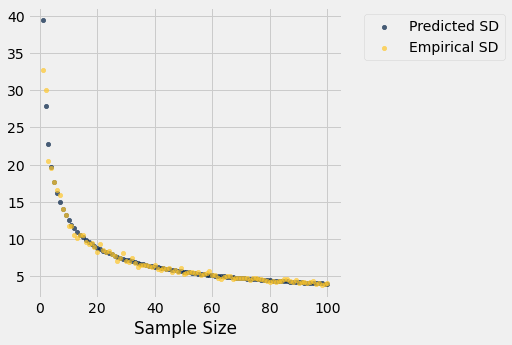

In [23]:
sd_table = Table().with_column('Sample Size', np.arange(1,101))
predicted = sd_table.apply(predict_sample_mean_sd, 'Sample Size')
empirical = sd_table.apply(empirical_sample_mean_sd, 'Sample Size')
sd_table = sd_table.with_columns('Predicted SD', predicted, 'Empirical SD', empirical)
sd_table.scatter('Sample Size')

**Question 5:** Do our predicted and empirical values match? Why is this the case?

Yes the predicted and empirical values match since the distribution is normal.

<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [24]:
grader.check_all()

q1.3 results: All test cases passed!

q1.4 results: All test cases passed!

q1.7 results: All test cases passed!

q2.1 results: All test cases passed!

q2.3 results: All test cases passed!

q2.4 results: All test cases passed!